In [1]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read all file
all_files_path=glob('dataverse_files/*.edf')
print(len(all_files_path))

28


In [3]:
all_files_path[0]

'dataverse_files\\h01.edf'

In [4]:
healthy_file_path=[i for i in all_files_path if  'h' in i.split('\\')[1]]
patient_file_path=[i for i in all_files_path if  's' in i.split('\\')[1]]

In [5]:
def read_data(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0)
    epochs=epochs.get_data()
    return epochs #trials,channel,length

In [6]:
data=read_data(healthy_file_path[0])

Extracting EDF parameters from C:\Users\ARADHANA\Documents\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items acti

In [7]:
data.shape

(37, 19, 6250)

In [8]:
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

Extracting EDF parameters from C:\Users\ARADHANA\Documents\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items acti

Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\ARADHANA\Documents\dataverse_files\h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 co

No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\ARADHANA\Documents\dataverse_files\s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff freq

Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 sec)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\ARADHANA\Documents\dataverse_files\s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =  

In [9]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))

14 14


In [10]:
data_list=control_epochs_array+patients_epochs_array
label_list=control_epochs_labels+patients_epochs_labels
print(len(data_list),len(label_list))

28 28


In [11]:
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [12]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape,group_array.shape)

(1142, 6250, 19) (1142,) (1142,)


In [13]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
def cnnmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(6250,19)))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(1,activation='sigmoid'))#11
    
    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6248, 5)           290       
                                                                 
 batch_normalization (BatchN  (None, 6248, 5)          20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6248, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3124, 5)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 3122, 5)           80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3122, 5)           0

In [14]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [28]:
accuracy=[]
history = []
for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
    train_features,train_labels=data_array[train_index],label_array[train_index]
    test_features,test_labels=data_array[test_index],label_array[test_index]
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    test_features = scaler.transform(test_features.reshape(-1, test_features.shape[-1])).reshape(test_features.shape)
    model=cnnmodel()
    history.append(model.fit(train_features,train_labels,epochs= 20,batch_size= 64 ,validation_split=0.2))
    accuracy.append(model.evaluate(test_features,test_labels)[1])

Epoch 1/20
12/12 [==============================] - 2s 113ms/step - loss: 0.6788 - accuracy: 0.6085 - val_loss: 0.8735 - val_accuracy: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 1s 91ms/step - loss: 0.6726 - accuracy: 0.6085 - val_loss: 0.9270 - val_accuracy: 0.0000e+00
Epoch 3/20
12/12 [==============================] - 1s 88ms/step - loss: 0.6689 - accuracy: 0.6085 - val_loss: 0.9571 - val_accuracy: 0.0000e+00
Epoch 4/20
12/12 [==============================] - 1s 88ms/step - loss: 0.6676 - accuracy: 0.6085 - val_loss: 0.9576 - val_accuracy: 0.0000e+00
Epoch 5/20
12/12 [==============================] - 1s 88ms/step - loss: 0.6683 - accuracy: 0.6085 - val_loss: 0.9041 - val_accuracy: 0.0000e+00
Epoch 6/20
12/12 [==============================] - 1s 95ms/step - loss: 0.6641 - accuracy: 0.6085 - val_loss: 0.9245 - val_accuracy: 0.0000e+00
Epoch 7/20
12/12 [==============================] - 1s 95ms/step - loss: 0.6622 - accuracy: 0.6085 - val_loss: 0.9465 - val_accur

Epoch 17/20
12/12 [==============================] - 1s 117ms/step - loss: 0.2162 - accuracy: 0.9421 - val_loss: 0.6799 - val_accuracy: 0.6099
Epoch 18/20
12/12 [==============================] - 1s 116ms/step - loss: 0.1650 - accuracy: 0.9725 - val_loss: 1.2266 - val_accuracy: 0.3846
Epoch 19/20
12/12 [==============================] - 1s 112ms/step - loss: 0.1483 - accuracy: 0.9683 - val_loss: 1.0734 - val_accuracy: 0.4615
Epoch 20/20
8/8 [==============================] - 0s 17ms/step - loss: 0.9338 - accuracy: 0.7778
Epoch 1/20
12/12 [==============================] - 2s 122ms/step - loss: 0.6939 - accuracy: 0.5649 - val_loss: 0.7756 - val_accuracy: 0.0000e+00
Epoch 2/20
12/12 [==============================] - 1s 109ms/step - loss: 0.6897 - accuracy: 0.5649 - val_loss: 0.7557 - val_accuracy: 0.0000e+00
Epoch 3/20
12/12 [==============================] - 1s 111ms/step - loss: 0.6842 - accuracy: 0.5649 - val_loss: 0.7811 - val_accuracy: 0.0000e+00
Epoch 4/20
12/12 [=================

In [29]:
print(len(train_index), len(test_index))


907 235


In [30]:
EPOCHS = len(history[0].history['loss']) 
print(EPOCHS)

20


In [31]:
print(len(history), len(accuracy))

5 5


In [32]:
acc = history[4].history['accuracy']
print(len(acc))

20


In [33]:
acc=[]
val_acc= []
loss = []
val_loss = []

for i in range(0, len(history)):
    acc.append(history[i].history['accuracy'])
    val_acc.append(history[i].history['val_accuracy'])
    loss.append(history[i].history['loss'])
    val_loss.append(history[i].history['val_loss'])

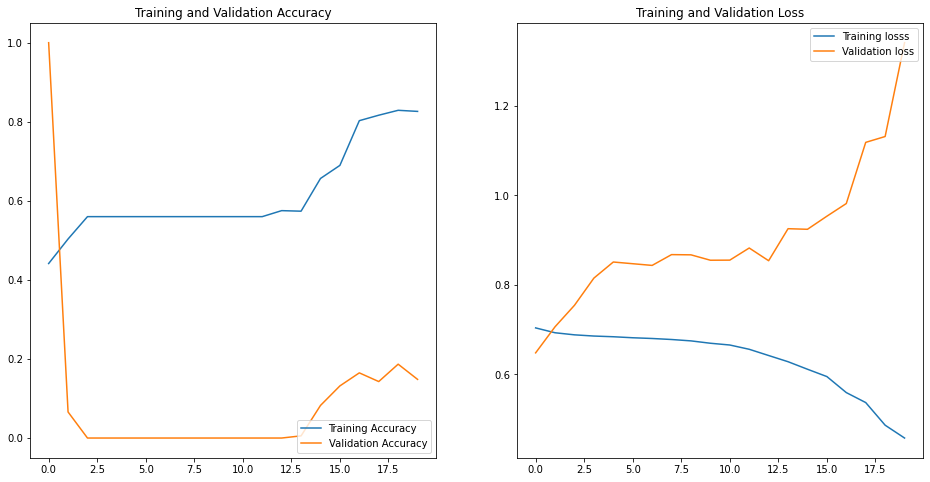

In [37]:
plt.figure(figsize =(16,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc[4] , label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc[4] , label ='Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss[4] , label ='Training losss')
plt.plot(range(EPOCHS), val_loss[4] , label ='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
np.mean(accuracy)

0.6285983562469483

In [24]:
print(train_features[0].shape)
print(test_features[0].shape)

(6250, 19)
(6250, 19)


In [26]:
from sklearn.metrics import confusion_matrix 
t_fs = train_features[0]
print(t_fs.shape)
te_fs = test_features[0]
r = confusion_matrix(t_fs, te_fs)

print(r)

(6250, 19)


ValueError: continuous-multioutput is not supported

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(test_features , train_features))
print('Recall: %.3f' % recall_score(test_features , train_features))
print('Accuracy: %.3f' % accuracy_score(test_features , train_features))
print('F1 Score: %.3f' % f1_score(test_features , train_features))

ValueError: Found input variables with inconsistent numbers of samples: [235, 907]